# Inference for Numerical Data

<img src="images/birth.jpg"/>

### Libraries
In this lab we will explore the data using the `dplyr` package and visualize it using the `ggplot2` package for data visualization. The data can be found in the companion package for this course, `statsr`.

In [2]:
#install.packages("package")
library(statsr)
library(dplyr)
library(ggplot2)
library(tidyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In 2004, the state of North Carolina released a large data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. We will work with a random sample of observations from this data set.. Let's load the data.

### Load Data

In [3]:
data(nc)
head(nc)

fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
<int>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>
NA,13,younger mom,39,full term,10,married,38,7.63,not low,male,nonsmoker,not white
NA,14,younger mom,42,full term,15,married,20,7.88,not low,male,nonsmoker,not white
19,15,younger mom,37,full term,11,married,38,6.63,not low,female,nonsmoker,white
21,15,younger mom,41,full term,6,married,34,8.00,not low,male,nonsmoker,white
NA,15,younger mom,39,full term,9,married,27,6.38,not low,female,nonsmoker,not white
NA,15,younger mom,38,full term,19,married,22,5.38,low,male,nonsmoker,not white


We have observations on 13 different variables, some categorical and some 
numerical. The meaning of each variable is as follows.

variable         | description
---------------- | ---------------------------------------------
`fage`           | father's age in years.
`mage`           | mother's age in years.
`mature`         | maturity status of mother.
`weeks`          | length of pregnancy in weeks.
`premie`         | whether the birth was classified as premature (premie) or full-term.
`visits`         | number of hospital visits during pregnancy.
`marital`        | whether mother is `married` or `not married` at birth.
`gained`         | weight gained by mother during pregnancy in pounds.
`weight`         | weight of the baby at birth in pounds.
`lowbirthweight` | whether baby was classified as low birthweight (`low`) or not (`not low`).
`gender`         | gender of the baby, `female` or `male`.
`habit`          | status of the mother as a `nonsmoker` or a `smoker`.
`whitemom`       | whether mom is `white` or `not white`.

As a first step in the analysis, we should take a look at the variables in the dataset. This can be done using the `str` command:

In [5]:
str(nc)

tibble [1,000 x 13] (S3: tbl_df/tbl/data.frame)
 $ fage          : int [1:1000] NA NA 19 21 NA NA 18 17 NA 20 ...
 $ mage          : int [1:1000] 13 14 15 15 15 15 15 15 16 16 ...
 $ mature        : Factor w/ 2 levels "mature mom","younger mom": 2 2 2 2 2 2 2 2 2 2 ...
 $ weeks         : int [1:1000] 39 42 37 41 39 38 37 35 38 37 ...
 $ premie        : Factor w/ 2 levels "full term","premie": 1 1 1 1 1 1 1 2 1 1 ...
 $ visits        : int [1:1000] 10 15 11 6 9 19 12 5 9 13 ...
 $ marital       : Factor w/ 2 levels "married","not married": 1 1 1 1 1 1 1 1 1 1 ...
 $ gained        : int [1:1000] 38 20 38 34 27 22 76 15 NA 52 ...
 $ weight        : num [1:1000] 7.63 7.88 6.63 8 6.38 5.38 8.44 4.69 8.81 6.94 ...
 $ lowbirthweight: Factor w/ 2 levels "low","not low": 2 2 2 2 2 1 2 1 2 2 ...
 $ gender        : Factor w/ 2 levels "female","male": 2 2 1 2 1 2 2 2 2 1 ...
 $ habit         : Factor w/ 2 levels "nonsmoker","smoker": 1 1 1 1 1 1 1 1 1 1 ...
 $ whitemom      : Factor w/ 2 levels "n

We will first start with analyzing the weight gained by mothers throughout the  pregnancy: `gained`.

Using visualization and summary statistics, describe the distribution of weight  gained by mothers during pregnancy. The `summary` function can also be useful.

In [4]:
summary(nc)

      fage            mage            mature        weeks             premie   
 Min.   :14.00   Min.   :13   mature mom :133   Min.   :20.00   full term:846  
 1st Qu.:25.00   1st Qu.:22   younger mom:867   1st Qu.:37.00   premie   :152  
 Median :30.00   Median :27                     Median :39.00   NA's     :  2  
 Mean   :30.26   Mean   :27                     Mean   :38.33                  
 3rd Qu.:35.00   3rd Qu.:32                     3rd Qu.:40.00                  
 Max.   :55.00   Max.   :50                     Max.   :45.00                  
 NA's   :171                                    NA's   :2                      
     visits            marital        gained          weight      
 Min.   : 0.0   married    :386   Min.   : 0.00   Min.   : 1.000  
 1st Qu.:10.0   not married:613   1st Qu.:20.00   1st Qu.: 6.380  
 Median :12.0   NA's       :  1   Median :30.00   Median : 7.310  
 Mean   :12.1                     Mean   :30.33   Mean   : 7.101  
 3rd Qu.:15.0            

Next, consider the possible relationship between a mother's smoking habit and the  weight of her baby. Plotting the data is a useful first step because it helps 
us quickly visualize trends, identify strong associations, and develop research questions.

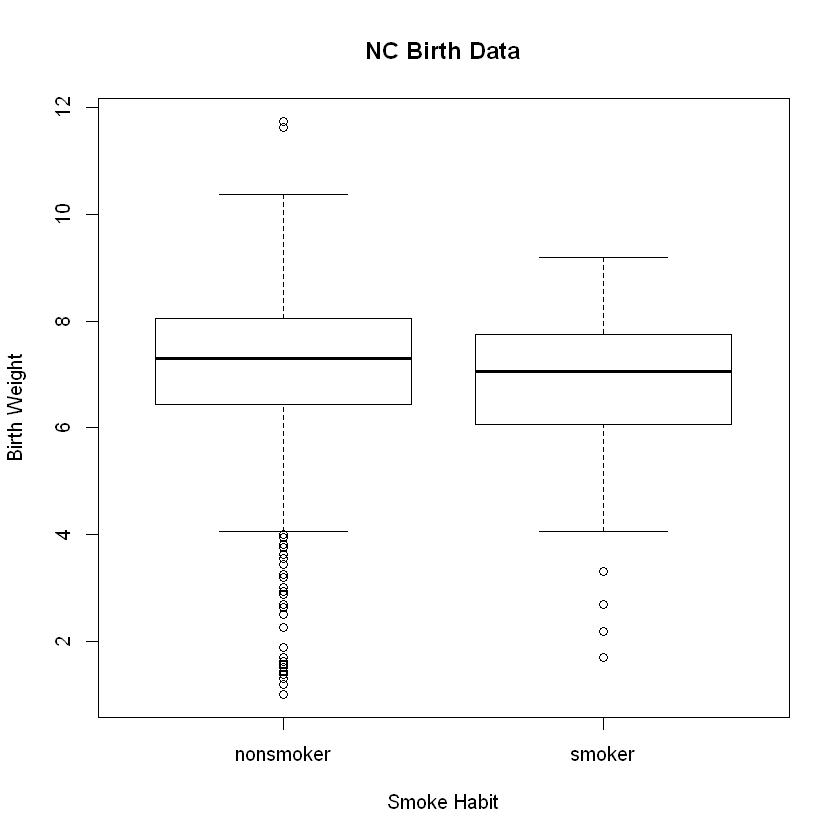

In [6]:
boxplot(weight~habit,data=nc, main="NC Birth Data", xlab="Smoke Habit", ylab="Birth Weight")

The box plots show how the medians of the two distributions compare, but we can also compare the means of the distributions using the following to first group the data by the `habit` variable, and then calculate the mean `weight` in these groups using the `mean` function.

In [7]:
nc %>%
  group_by(habit) %>%
  summarise(mean_weight = mean(weight))

`summarise()` ungrouping output (override with `.groups` argument)



habit,mean_weight
<fct>,<dbl>
nonsmoker,7.144273
smoker,6.828730
NA,3.630000


There is an observed difference, but is this difference statistically significant? In order to answer this question we will conduct a hypothesis test.

## Inference
Are all conditions necessary for inference satisfied? You can compute the group sizes using the same `by` command above but replacing `mean(weight)` with `n()`.

In [9]:
nc %>%
  group_by(habit) %>%
  summarise(group_size = n())

`summarise()` ungrouping output (override with `.groups` argument)



habit,group_size
<fct>,<int>
nonsmoker,873
smoker,126
NA,1


Next, we introduce a new function, `inference`, that we will use for conducting hypothesis tests and constructing confidence intervals. 

Response variable: numerical
Explanatory variable: categorical (2 levels) 
n_nonsmoker = 873, y_bar_nonsmoker = 7.1443, s_nonsmoker = 1.5187
n_smoker = 126, y_bar_smoker = 6.8287, s_smoker = 1.3862
H0: mu_nonsmoker =  mu_smoker
HA: mu_nonsmoker != mu_smoker
t = 2.359, df = 125
p_value = 0.0199

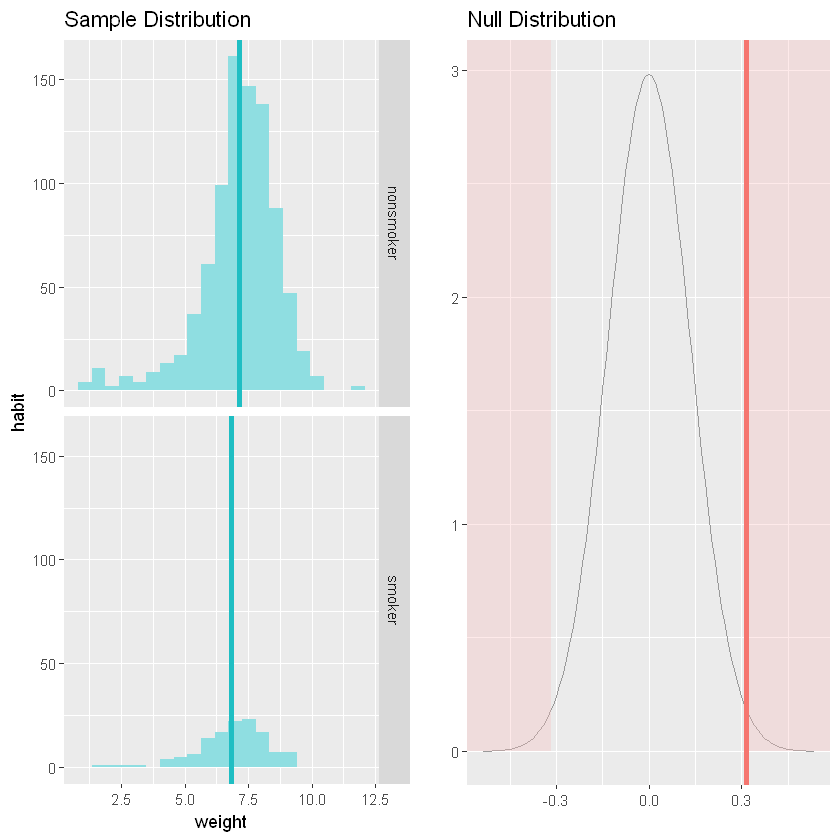

In [10]:
inference(y = weight, x = habit, data = nc, statistic = "mean", type = "ht", null = 0, 
          alternative = "twosided", method = "theoretical")

Let's pause for a moment to go through the arguments of this custom function. The first argument is `y`, which is the response variable that we are interested in: `weight`. 

The second argument is the explanatory variable, `x`, which is the variable that splits the data into two groups, smokers and 
non-smokers: `habit`. 

The third argument, `data`, is the data frame these variables are stored in. 

Next is `statistic`, which is the sample statistic we're using, or similarly, the population parameter we're estimating. In future labs we can also work with "median" and "proportion". 

Next we decide on the `type` of inference we want: a hypothesis test (`"ht"`) or a confidence interval (`"ci"`). 

When performing a hypothesis test, we also need to supply the `null` value, which in this case is `0`, since the null hypothesis sets the two population means equal to each other. 

The `alternative` hypothesis can be `"less"`, `"greater"`, or `"twosided"`.

Lastly, the `method` of inference can be `"theoretical"` or `"simulation"` based.

**Exercise:** Change the `type` argument to `"ci"` to construct and record a confidence interval for the difference between the weights of babies born to nonsmoking and smoking mothers, and interpret this interval in context of the data. Note that by default you'll get a 95% confidence interval. 

If you want to change the confidence level, add a new argument (`conf_level`) which takes on a valuebetween 0 and 1. Also note that when doing a confidence interval arguments like `null` and `alternative` are not useful, so make sure to remove them.

Response variable: numerical, Explanatory variable: categorical (2 levels)
n_nonsmoker = 873, y_bar_nonsmoker = 7.1443, s_nonsmoker = 1.5187
n_smoker = 126, y_bar_smoker = 6.8287, s_smoker = 1.3862
95% CI (nonsmoker - smoker): (0.0508 , 0.5803)


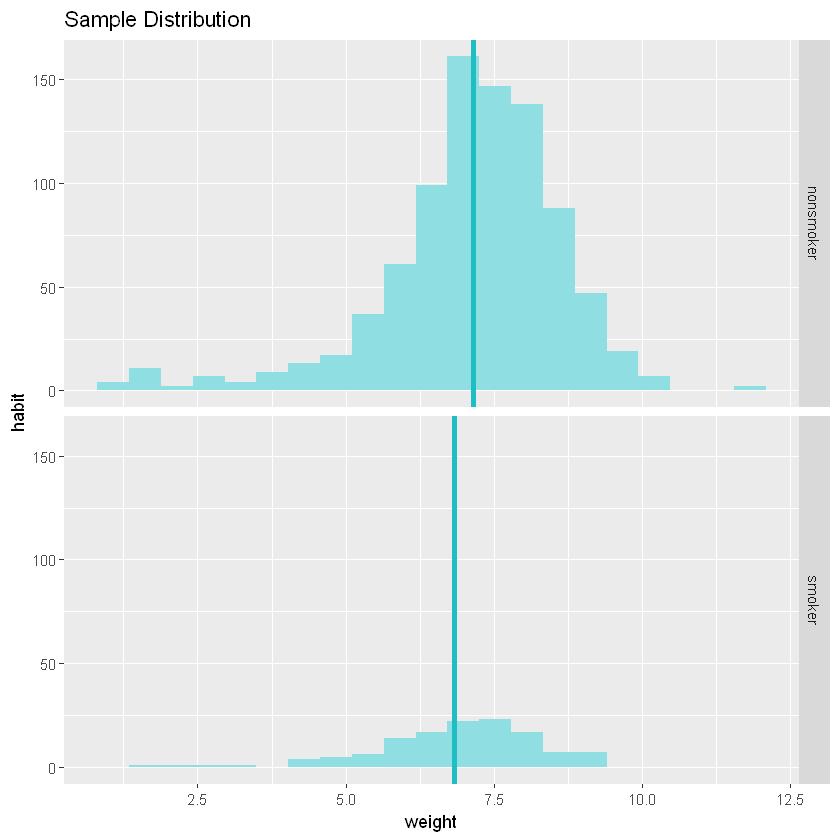

In [11]:
inference(y=weight, x=habit, data=nc, statistic = 'mean', type='ci', method='theoretical')

By default the function reports an interval for ($\mu_{nonsmoker} - \mu_{smoker}$)
. We can easily change this order by using the `order` argument:

    inference(y = weight, x = habit, data = nc, statistic = "mean", type = "ci", method = "theoretical", 
              order = c("smoker","nonsmoker"))

Response variable: numerical, Explanatory variable: categorical (2 levels)
n_smoker = 126, y_bar_smoker = 6.8287, s_smoker = 1.3862
n_nonsmoker = 873, y_bar_nonsmoker = 7.1443, s_nonsmoker = 1.5187
95% CI (smoker - nonsmoker): (-0.5803 , -0.0508)


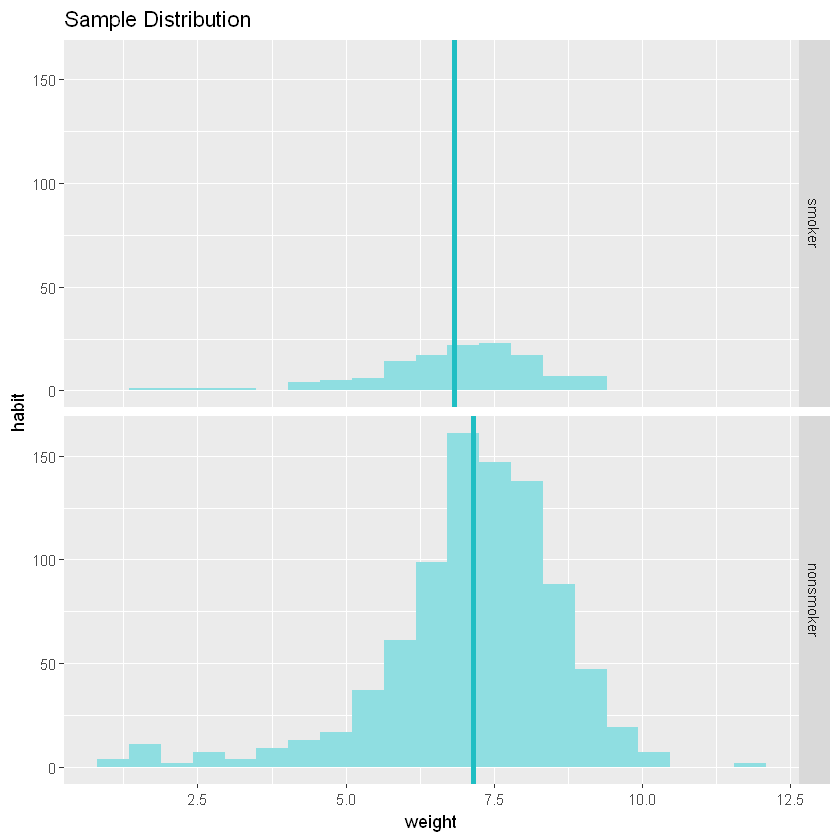

In [12]:
inference(y = weight, x = habit, data = nc, statistic = "mean", type = "ci", 
          method = "theoretical", order = c("smoker","nonsmoker"))

**Exercise:** Calculate a 99% confidence interval for the average length of pregnancies (`weeks`). Note that since you're doing inference on a single population parameter, there is no explanatory variable, so you can omit the `x` variable from the function. Which of the following is the correct interpretation of this interval?

Single numerical variable
n = 998, y-bar = 38.3347, s = 2.9316
99% CI: (38.0952 , 38.5742)


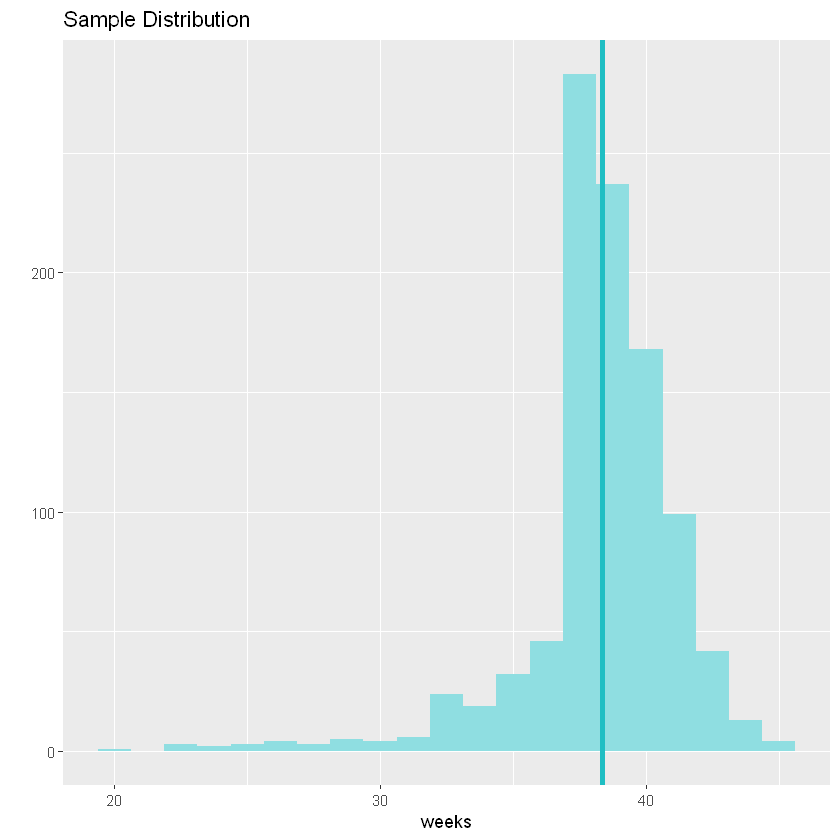

In [14]:
inference(y=weeks, data=nc, statistic = 'mean', type='ci', method='theoretical', conf_level = 0.99)

**Exercise:** Calculate a new confidence interval for the same parameter at the 90% confidence level. Comment on the width of this interval versus the one obtained in the the previous exercise.

Single numerical variable
n = 998, y-bar = 38.3347, s = 2.9316
90% CI: (38.1819 , 38.4874)


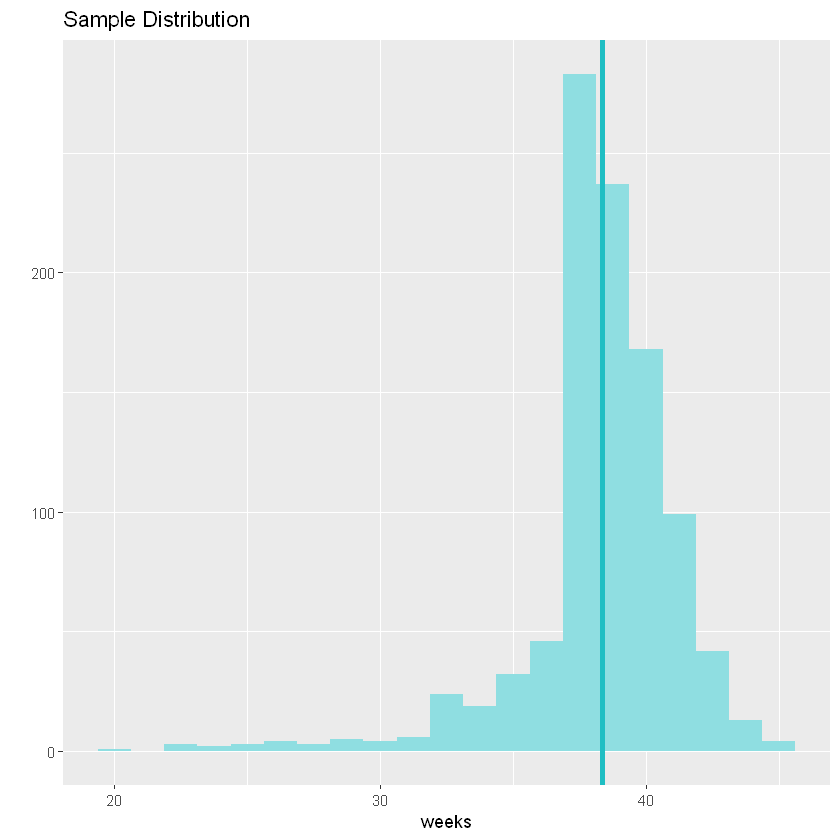

In [13]:
inference(y=weeks, data=nc, statistic = 'mean', type='ci', method='theoretical', conf_level = 0.90)

**Exercise**: Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.

Response variable: numerical
Explanatory variable: categorical (2 levels) 
n_mature mom = 129, y_bar_mature mom = 28.7907, s_mature mom = 13.4824
n_younger mom = 844, y_bar_younger mom = 30.5604, s_younger mom = 14.3469
H0: mu_mature mom =  mu_younger mom
HA: mu_mature mom != mu_younger mom
t = -1.3765, df = 128
p_value = 0.1711

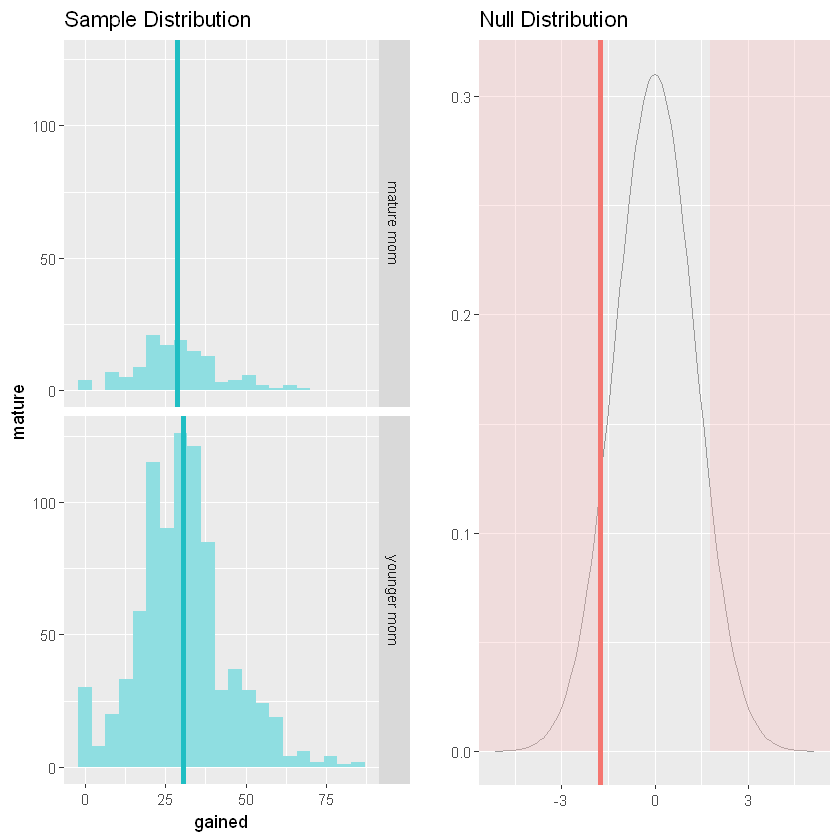

In [15]:
inference(y=gained, x=mature, data=nc, statistic = 'mean', type='ht', null=0, alternative = 'twosided', method='theoretical')

**Exercise:** Now, a non-inference task: Determine the age cutoff for younger and mature mothers.

In [16]:
by(nc$mage, nc$mature, summary)

nc$mature: mature mom
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  35.00   35.00   37.00   37.18   38.00   50.00 
------------------------------------------------------------ 
nc$mature: younger mom
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   21.00   25.00   25.44   30.00   34.00 

**Exercise**: Pick a pair of variables: one numerical (response) and one categorical (explanatory). Come up with a research question evaluating the relationship between these variables. Formulate the question in a way that it can be answered using a 
hypothesis test and/or a confidence interval. Answer your question using the `inference` function, report the statistical results, and also provide an explanation in plain language. Be sure to check all assumptions,state your $\alpha$ level, and conclude in context. (Note: Picking your own variables, coming up with a research question, and analyzing the data to answer this question is basically what you'll need to do for your project as well.)

Response variable: numerical
Explanatory variable: categorical (2 levels) 
n_full term = 846, y_bar_full term = 27, s_full term = 6.1444
n_premie = 152, y_bar_premie = 26.875, s_premie = 6.533
H0: mu_full term =  mu_premie
HA: mu_full term != mu_premie
t = 0.2191, df = 151
p_value = 0.8268

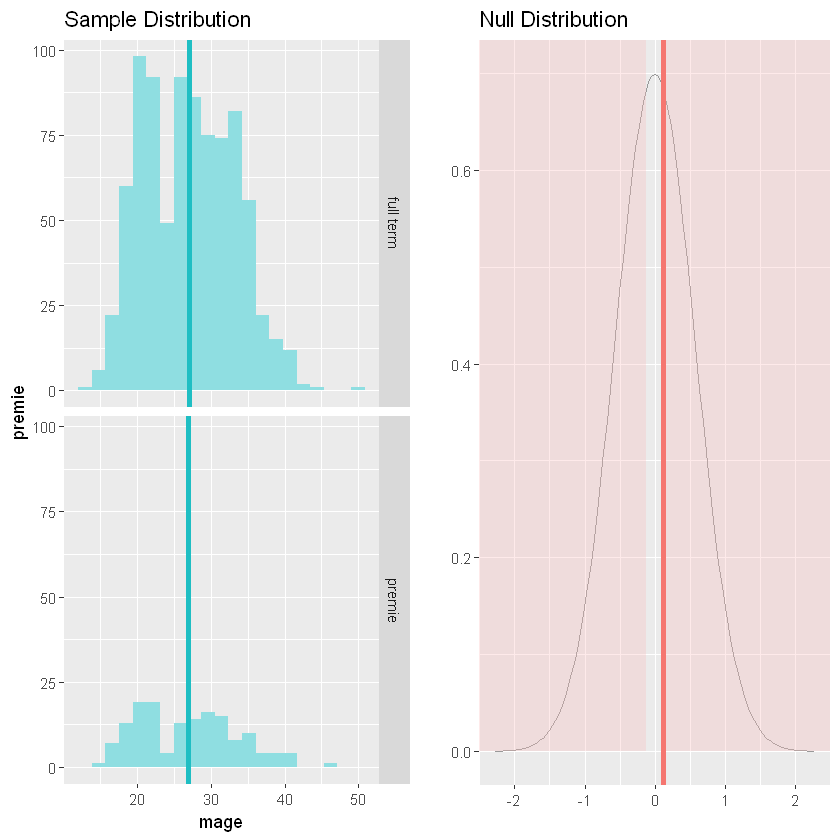

In [17]:
inference(y=mage, x=premie, data=nc, statistic = 'mean', type='ht', null=0, alternative = 'twosided', method = 'theoretical')